In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = False

In [4]:
roots = [3.64095690650721,
        3.5184492410503965,
        3.393522159945615,
        3.2659503538230608,
        3.1354715107049764,
        3.0017774197047054,
        2.8645022087095424,
        2.7232065461969945,
        2.577356059664392,
        2.426291319035178,
        2.2691853142129728, 
        2.104982167992544, 
        1.932307699120554,
        1.749339162933206, 
        1.5536238493280832, 
        1.34187327905057, 
        1.109960313758399, 
        0.8541630993606272, 
        0.5762735442012712, 
        0.2885386111960936, 
        0.03198372863548067]
jds = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [5]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [6]:
Jd = 1.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
#epochs = opt_epochs[Jd]

markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

Ls = [20, 30, 60, 80]
epochs = [3] * len(Ls)

errs_ = []
outs_ = []

def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

for i, L in enumerate(Ls):
    num_epochs = epochs[i]
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))


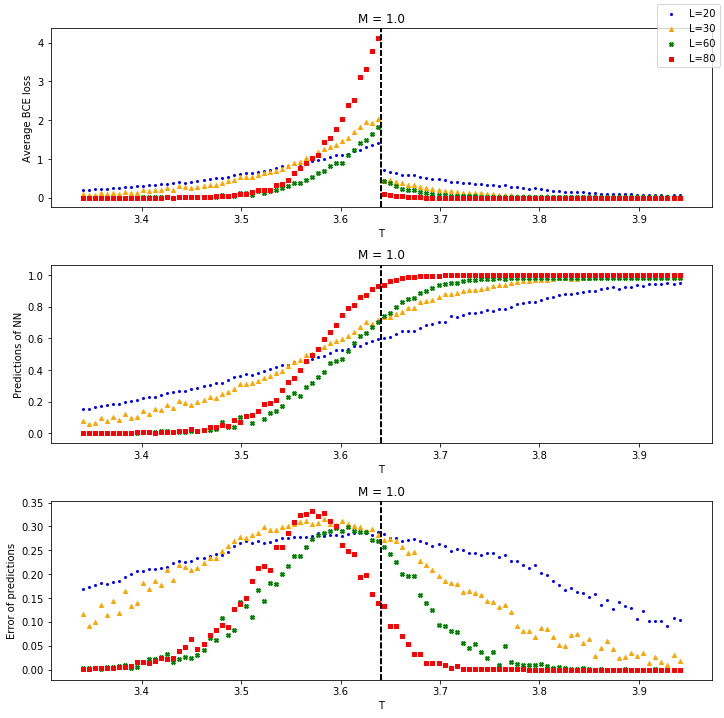

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker=markers[i], c=colors[i], s=16)
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    #ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], c=colors[i], s=16)


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'Jd = {Jd}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/m-{M}.png')

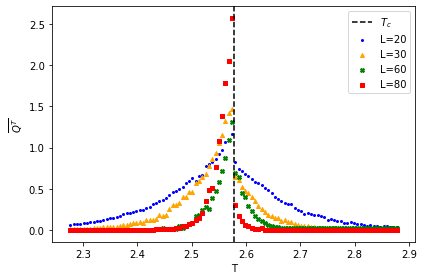

In [36]:
for i, L in enumerate(Ls):
    plt.scatter(T, errs(errs_[i]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.xlabel('T')
    plt.ylabel('$\overline{Q^T}$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png')

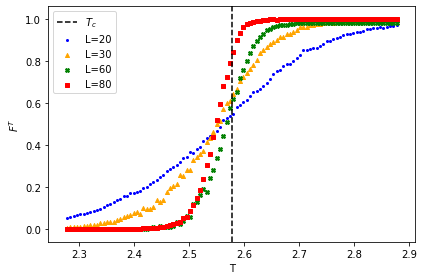

In [37]:
for i, L in enumerate(Ls):
    plt.scatter(T, errs(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.xlabel('T')
    plt.ylabel('$F^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')

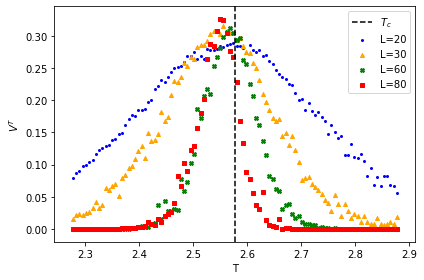

In [38]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.xlabel('T')
    plt.ylabel('$V^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

In [14]:
pred_tc = {}
    
for Jd in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7. 0.8, 0.9]:
    T_c = get_crit_T[Jd]
    T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

    #opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
    #epochs = opt_epochs[Jd]

    Ls = [20, 30, 60, 80]
    epochs = [3] * len(Ls)

    errs_ = []
    outs_ = []

    def errs(errs):
        return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

    def stds_err(errs):
        return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

    for i, L in enumerate(Ls):
        num_epochs = epochs[i]
        # with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        #     errs_.append(np.load(f)) 
        with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
            outs_.append(np.squeeze(np.load(f)))

    tcs_idxs = []
    if Jd != 0.0:
        for i in range(len(Ls)):
            tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_[i][:, 0]))))
    else:
        for i in range(len(Ls)):
            tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_[i]))))     
    pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(len(Ls))])

In [15]:
pred_tc

{0.0: 2.278276223303882,
 0.1: 2.412654955398814,
 0.2: 2.556143938452271,
 0.3: 2.7004792734697216,
 0.4: 2.8326840268913607,
 0.5: 2.960868328795615,
 0.6: 3.0915321167655825,
 0.7: 3.217465505338212}

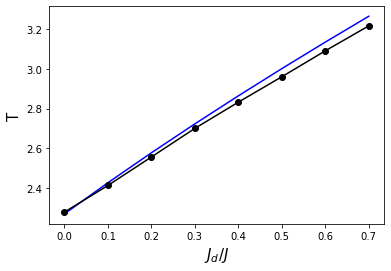

In [16]:
Jds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

plt.figure(facecolor='white')
plt.plot(Jds, [get_crit_T[Jd] for Jd in Jds], color='blue')
plt.errorbar(Jds, [pred_tc[Jd] for Jd in Jds], yerr=T[1] - T[0], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('$J_d/J$', fontsize=15)
plt.ylabel('T', fontsize=15)
plt.savefig(f'images/tcs_jd_ferr.png', bbox_inches='tight')

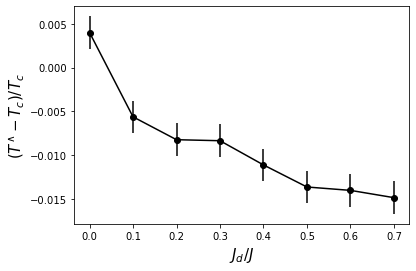

In [17]:
Jds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

plt.figure(facecolor='white')
plt.errorbar(Jds, [(pred_tc[Jd] - get_crit_T[Jd]) / get_crit_T[Jd] for Jd in Jds], yerr=(T[1] - T[0])/ get_crit_T[Jd], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('$J_d/J$', fontsize=15)
plt.ylabel('$(T^{\wedge} - T_c)/T_c$', fontsize=15)
plt.savefig(f'images/tcs_diff_jd_ferr.png', bbox_inches='tight')

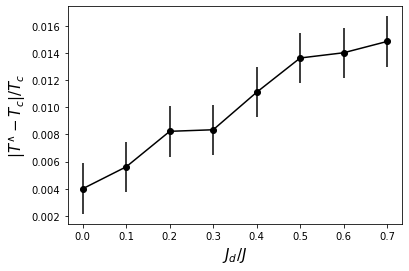

In [19]:
Jds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(facecolor='white')
plt.errorbar(Jds, [np.abs(pred_tc[Jd] - get_crit_T[Jd]) / get_crit_T[Jd] for Jd in Jds], yerr=(T[1] - T[0])/ get_crit_T[Jd], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('$J_d/J$', fontsize=15)
plt.ylabel('$|T^{\wedge} - T_c|/T_c$', fontsize=15)
plt.savefig(f'images/tcs_diff_jd_ferr.png', bbox_inches='tight')

In [6]:
mus = [2.2702, 2.4025, 2.5478, 2.6871, 2.8218, 2.9538, 3.0832, 3.2079, 3.3298, 3.4506]

jds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mus_rel = [np.abs(mus[i] - get_crit_T[jds[i]]) / get_crit_T[jds[i]] for i in range(len(jds))]
yerrs = [9e-4, 3e-4, 6e-4, 3e-4, 4e-4, 5e-4, 5e-4, 4e-4, 5e-4, 6e-4]

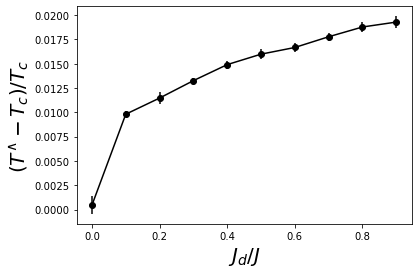

In [7]:
#yerrs = np.array([(np.array(ts_diff['max'][i]) - np.array(ts_diff['mean'][i]))/2/ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))])
plt.errorbar(jds, mus_rel, yerr=yerrs, marker='o', color='black')
plt.xlabel('$J_d/J$', fontsize=20)
plt.ylabel('$(T^{\wedge} - T_c)/T_c$', fontsize=20)
# plt.xlim([0, 1.1])
# plt.ylim([0, 0.05])

plt.savefig('images/ts_star_diff_jd_ferr.png')